In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#import the countries data from the csv file with an index column of countries
df_morn = pd.read_csv("./week_testing/Dulmini.csv")
df_morn.info()

#create columns for counts
counts_1_3 = df_morn['Chan_0_1']
counts_2_3 = df_morn['Chan_0_2']
counts_1_2 = df_morn['Chan_1_2']

timestamps = df_morn['timestamp'].values
print(type(timestamps))
print(df_morn)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Chan_0_1   1428 non-null   int64 
 1   Chan_0_2   1428 non-null   int64 
 2   Chan_1_2   1428 non-null   int64 
 3   timestamp  1428 non-null   object
dtypes: int64(3), object(1)
memory usage: 44.8+ KB
<class 'numpy.ndarray'>
      Chan_0_1  Chan_0_2  Chan_1_2                  timestamp
0            6         6        13   Tue Mar 28 16:18:39 2023
1            6         1         8   Tue Mar 28 16:19:39 2023
2            6         2        11   Tue Mar 28 16:20:39 2023
3            6         4        10   Tue Mar 28 16:21:39 2023
4            2         4        10   Tue Mar 28 16:22:44 2023
...        ...       ...       ...                        ...
1423         9         8        15   Wed Mar 29 15:59:06 2023
1424         4         7         7   Wed Mar 29 16:00:06 2023
1425         8        12   

In [3]:
df_morn.dropna(inplace=True)

In [4]:
df_morn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Chan_0_1   1428 non-null   int64 
 1   Chan_0_2   1428 non-null   int64 
 2   Chan_1_2   1428 non-null   int64 
 3   timestamp  1428 non-null   object
dtypes: int64(3), object(1)
memory usage: 44.8+ KB


In [5]:
df_morn['timestamp'] = pd.to_datetime(df_morn['timestamp'])
df_morn.head()

,Chan_0_1,Chan_0_2,Chan_1_2,timestamp
0,6,6,13,2023-03-28 16:18:39
1,6,1,8,2023-03-28 16:19:39
2,6,2,11,2023-03-28 16:20:39
3,6,4,10,2023-03-28 16:21:39
4,2,4,10,2023-03-28 16:22:44


In [6]:
df_morn.sort_values(by='timestamp', ascending=True, inplace=True)
df_morn.head()

,Chan_0_1,Chan_0_2,Chan_1_2,timestamp
0,6,6,13,2023-03-28 16:18:39
1,6,1,8,2023-03-28 16:19:39
2,6,2,11,2023-03-28 16:20:39
3,6,4,10,2023-03-28 16:21:39
4,2,4,10,2023-03-28 16:22:44


In [7]:
df_morn_counts = df_morn[['timestamp', 'Chan_0_1', 'Chan_0_2', 'Chan_1_2']]
df_morn_counts.columns

Index(['timestamp', 'Chan_0_1', 'Chan_0_2', 'Chan_1_2'], dtype='object')

In [8]:
df_morn_counts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1428 entries, 0 to 1427
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  1428 non-null   datetime64[ns]
 1   Chan_0_1   1428 non-null   int64         
 2   Chan_0_2   1428 non-null   int64         
 3   Chan_1_2   1428 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 55.8 KB


In [9]:
df_morn_counts = df_morn_counts.resample('H', on = 'timestamp', axis=0).mean()
df_morn_counts.head()

,Chan_0_1,Chan_0_2,Chan_1_2
timestamp,,,
2023-03-28 16:00:00,107.357143,28.523810,35.880952
2023-03-28 17:00:00,129.133333,32.933333,39.533333
2023-03-28 18:00:00,125.150000,31.550000,38.466667
2023-03-28 19:00:00,136.716667,34.766667,41.250000
2023-03-28 20:00:00,116.466667,27.483333,33.433333


In [10]:
#df_morn_counts= df_morn.interpolate(method='linear', limit_direction='both')  
#df_morn_counts.drop_duplicates(inplace=True)

#df_morn_counts.head(20)

Text(0.5, 1.0, 'March 18 Morning Individualized Counts')

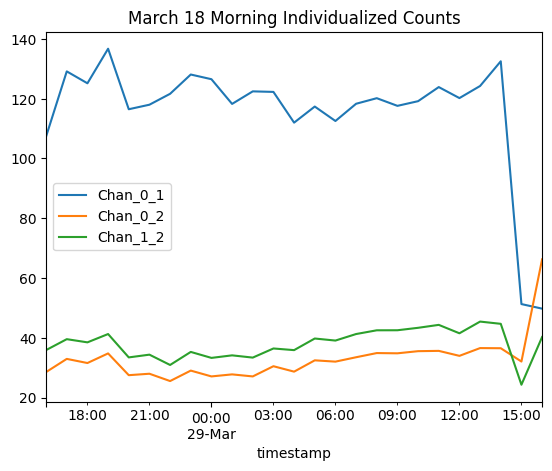

In [11]:
df_morn_counts.plot()
plt.title('March 18 Morning Individualized Counts')

In [12]:
df_morn_counts['average'] = df_morn_counts[['Chan_0_1', 'Chan_0_2', 'Chan_1_2']].mean(axis=1)
df_morn_counts.head()

,Chan_0_1,Chan_0_2,Chan_1_2,average
timestamp,,,,
2023-03-28 16:00:00,107.357143,28.523810,35.880952,57.253968
2023-03-28 17:00:00,129.133333,32.933333,39.533333,67.200000
2023-03-28 18:00:00,125.150000,31.550000,38.466667,65.055556
2023-03-28 19:00:00,136.716667,34.766667,41.250000,70.911111
2023-03-28 20:00:00,116.466667,27.483333,33.433333,59.127778


Text(0.5, 1.0, 'Dulmini Home March 28 to March 29')

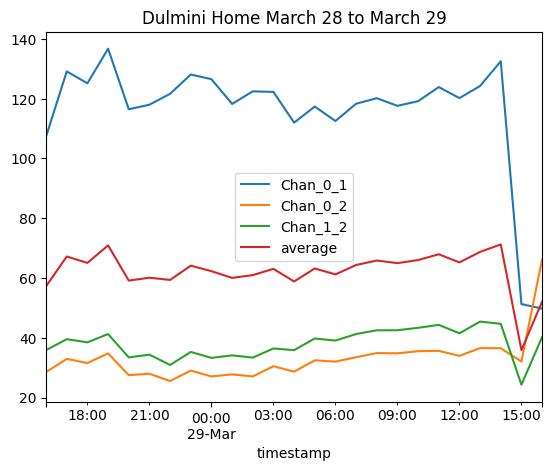

In [13]:
df_morn_counts.plot()
plt.title('Dulmini Home March 28 to March 29')
#plt.ylim(0, 150)

Text(0.5, 1.0, 'March 18 Morning Average Counts')

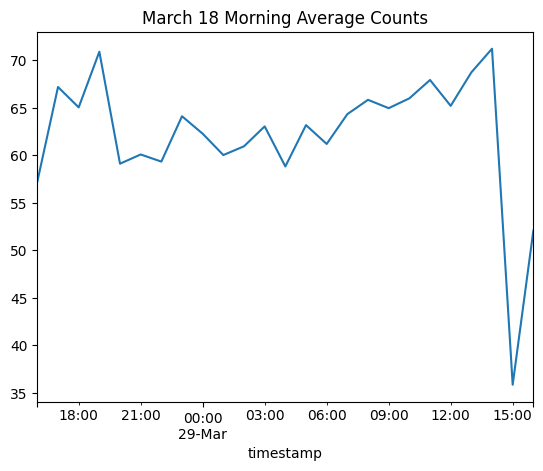

In [14]:
df_morn_counts['average'].plot()
plt.title('March 18 Morning Average Counts')